# **Titanic - Machine Learning from Disaster**

타이타닉 머신러닝 대회

기계 학습을 사용하여 타이타닉 난파선에서 살아남은 승객을 예측하는 모델을 만드는 대회

## **도전 과제**

타이타닉의 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다.

1912년 4월 15일, 처녀 항해 중 "침몰할 수 없는" 것으로 널리 알려진 RMS 타이타닉호가 빙산과 충돌하여 침몰했습니다. 

불행히도 탑승한 모든 사람을 위한 구명정이 충분하지 않아 승객과 승무원 2,224명 중 1,502명이 사망했습니다.

생존에는 어느 정도 운의 요소가 작용했지만, 일부 집단의 사람들은 다른 집단보다 생존할 가능성이 더 높았던 것으로 보인다.

이 챌린지에서는 승객 데이터(예: 이름, 연령, 성별, 사회 경제적 계층 등)를 사용하여 "어떤 종류의 사람들이 생존할 가능성이 더 높은가?"라는 질문에 답하는 예측 모델을 구축하도록 요청합니다.

## **참고**

[kaggle : Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)

[kaggle : Titanic Data Science Solutions](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook)

## **진행 상황**

<label for="Achievement">도전 과제 달성률 : </label>
<progress id="Achievement" max="8" value="3"></progress>

참고 / 진행 상황 업데이트

* ~~대회 이해~~
* ~~도전 과제~~
* ~~환경~~
    * ~~가상환경~~
    * ~~라이브러리~~
    * ~~데이터~~
* 탐색적 데이터 분석
    * ~~변수 확인~~
    * ~~변수의 척도와 형태에 따른 분류~~
    * **변수 간의 관계**
* 예측
* 시각화
* 가능한 해석
* 제출

### note 0 분석 계획

* 워크플로 7단계
    * 질문 또는 문제 정의
    * 학습데이터와 테스트데이터 수집
    * 데이터 정리 통합
    * Data Wrangling = Data Munging = raw data를 정리 통합
    * 데이터 분석, 패턴 식별, 탐색
    * 모델 만들고 예측
    * 문제 해결 최종 해결안 시각화, 정리 후 보고서화

* 워크플로 목표
    * 나누기
        * 분류, 샘플들을 나눈다
    * 상관관계
        * 피처들의 상관관계를 알아낸다
    * 바꾸기
        * 변환, 피처들의 타입을 범주형을 수치형으로 변환 할 수 있다.
    * 채우기 
        * 완료, 누락된 값을 채울 수 있다.
    * 고치기
        * 교정, 오류를 고치거나 폐기 할 수 있다.
    * 만들기
        * 기존 피처들을 사용해 새로운 피처를 만들 수도 있다 
    * 보이기
        * 시각화, 시각적으로 이해하기 위해 시각화 할 수 있다.


변수 확인
변수의 척도와 형태에 따른 분류
모집단과 표본집단 비교
데이터 수집 가능성
결측치 처리
이상치 처리
요류 처리


## **환경**

### 라이브러리

In [1]:
# 라이브러리 로드

import os
import io
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

import missingno as msno
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

### 데이터

In [2]:
# 데이터 로드

path_train = '/home/sjt/space/github/kaggle/data/titanic/train.csv'
path_test = '/home/sjt/space/github/kaggle/data/titanic/test.csv'

path_gender_submission = '/home/sjt/space/github/kaggle/data/titanic/gender_submission.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
df_gender_submission = pd.read_csv(path_gender_submission)

## **탐색적 데이터 분석**

### 변수 확인

In [3]:
# 변수 확인
# 변수 갯수, 변수 갯수, 결측치 수, 변수 타입, 메모리 사용량

display(df_train.info(), df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# 변수 확인 후 변수의 척도와 형태에 따른 분류

명목 = ['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
서열 = ['Pclass']
비율_이산 = ['SibSp', 'Parch']
비율_연속 = ['Age', 'Fare']

### note 1 변수 확인 후 변수의 척도와 형태에 따른 분류

총 12개의 변수

* 종속 변수
    * Survived = 생존 유무
* 독립 변수
    * PassengerId = 승객 id
    * Name = 승객 이름
    * Sex = 승객 성별
    * Age = 승객 나이
    * Ticket = 티켓 넘버
    * Pclass = Ticket class
        * 1 = 1st, 2 = 2nd, 3 = 3rd
    * SibSp = # of siblings / spouses aboard the Titanic
        * 타이타닉에 탄 형제,자매 수
    * Parch = # of parents / children aboard the Titanic	
        * 타이타닉에 탄 부모 수
    * Fare = Passenger fare
        * 요금
    * Cabin = Cabin number
        * 객실 넘버
    * Embarked = Port of Embarkation	
        * C = Cherbourg, Q = Queenstown, S = Southampton

* 변수의 척도와 형태에 따른 분류
    * 질적 척도
        * 명목 척도
            * Survived
            * Name
            * Sex
            * Ticket
            * Cabin
            * Embarked
        * 서열 척도
            * Pclass
    * 양적 척도
        * 등간 척도
        * 비율 척도
            * 이산형 변수
                * SibSp
                * Parch
            * 연속형 변수
                * Age
                * Fare


### 결측치 확인

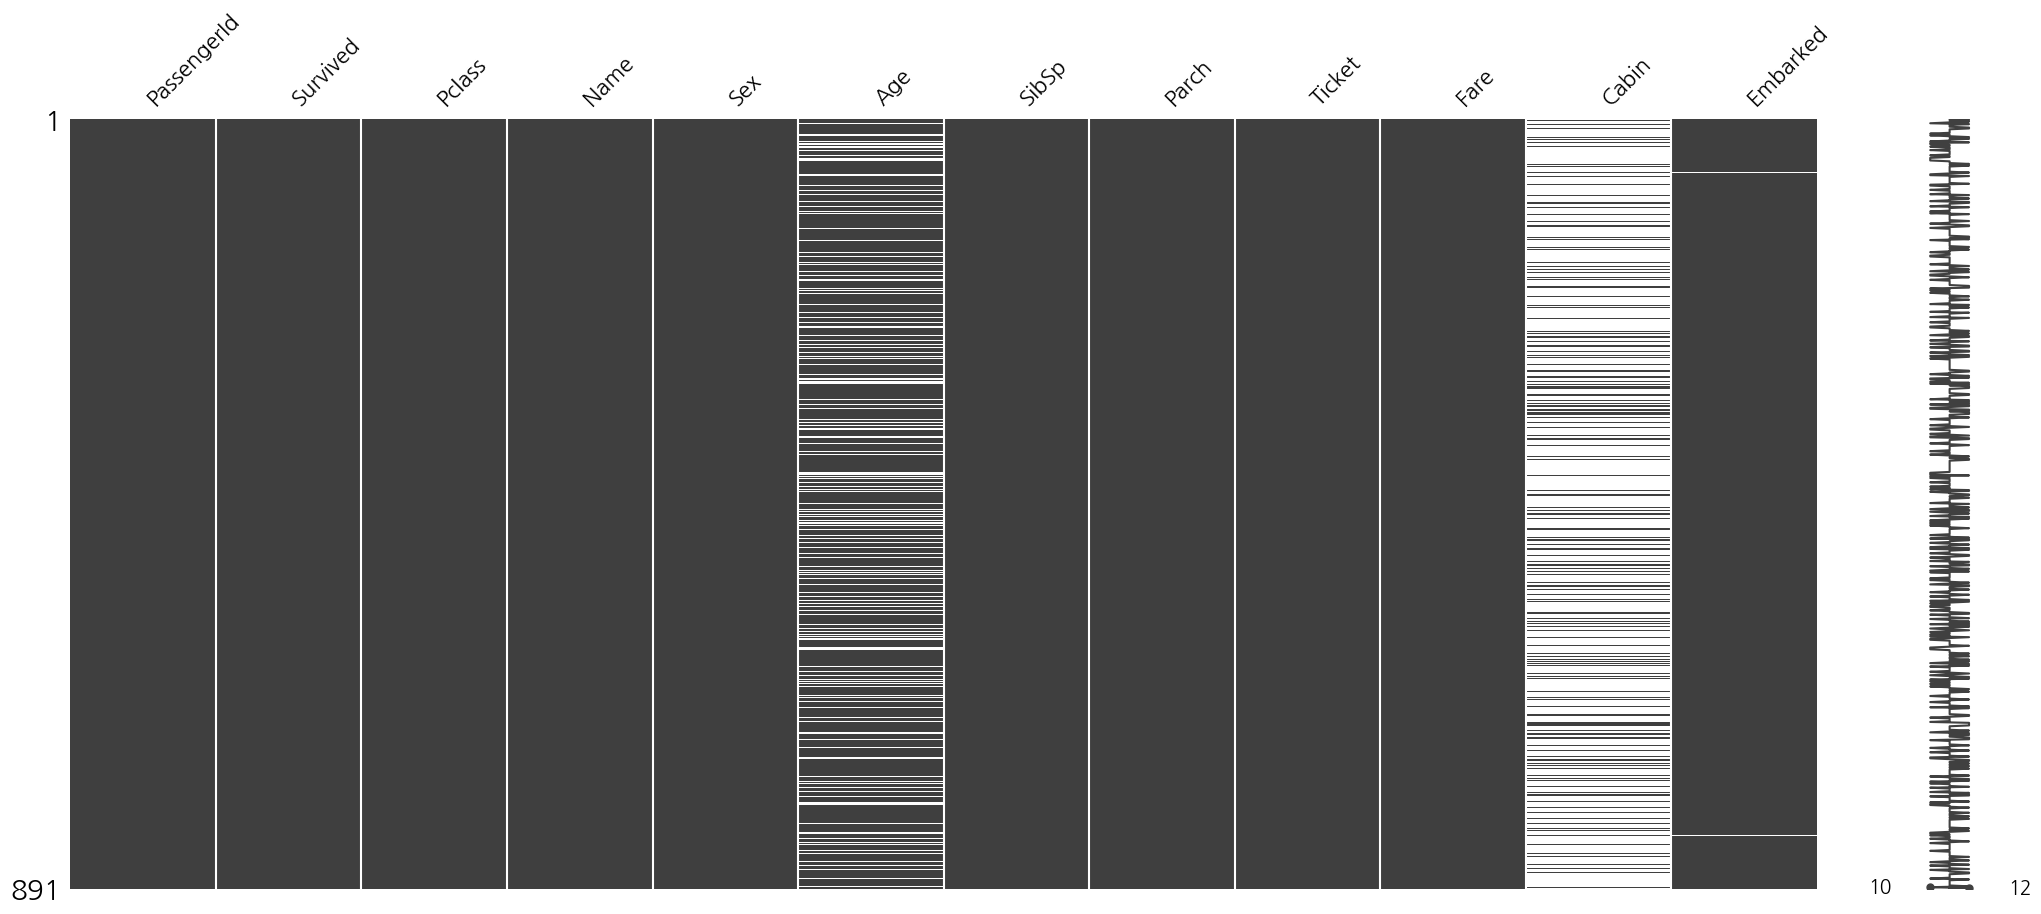

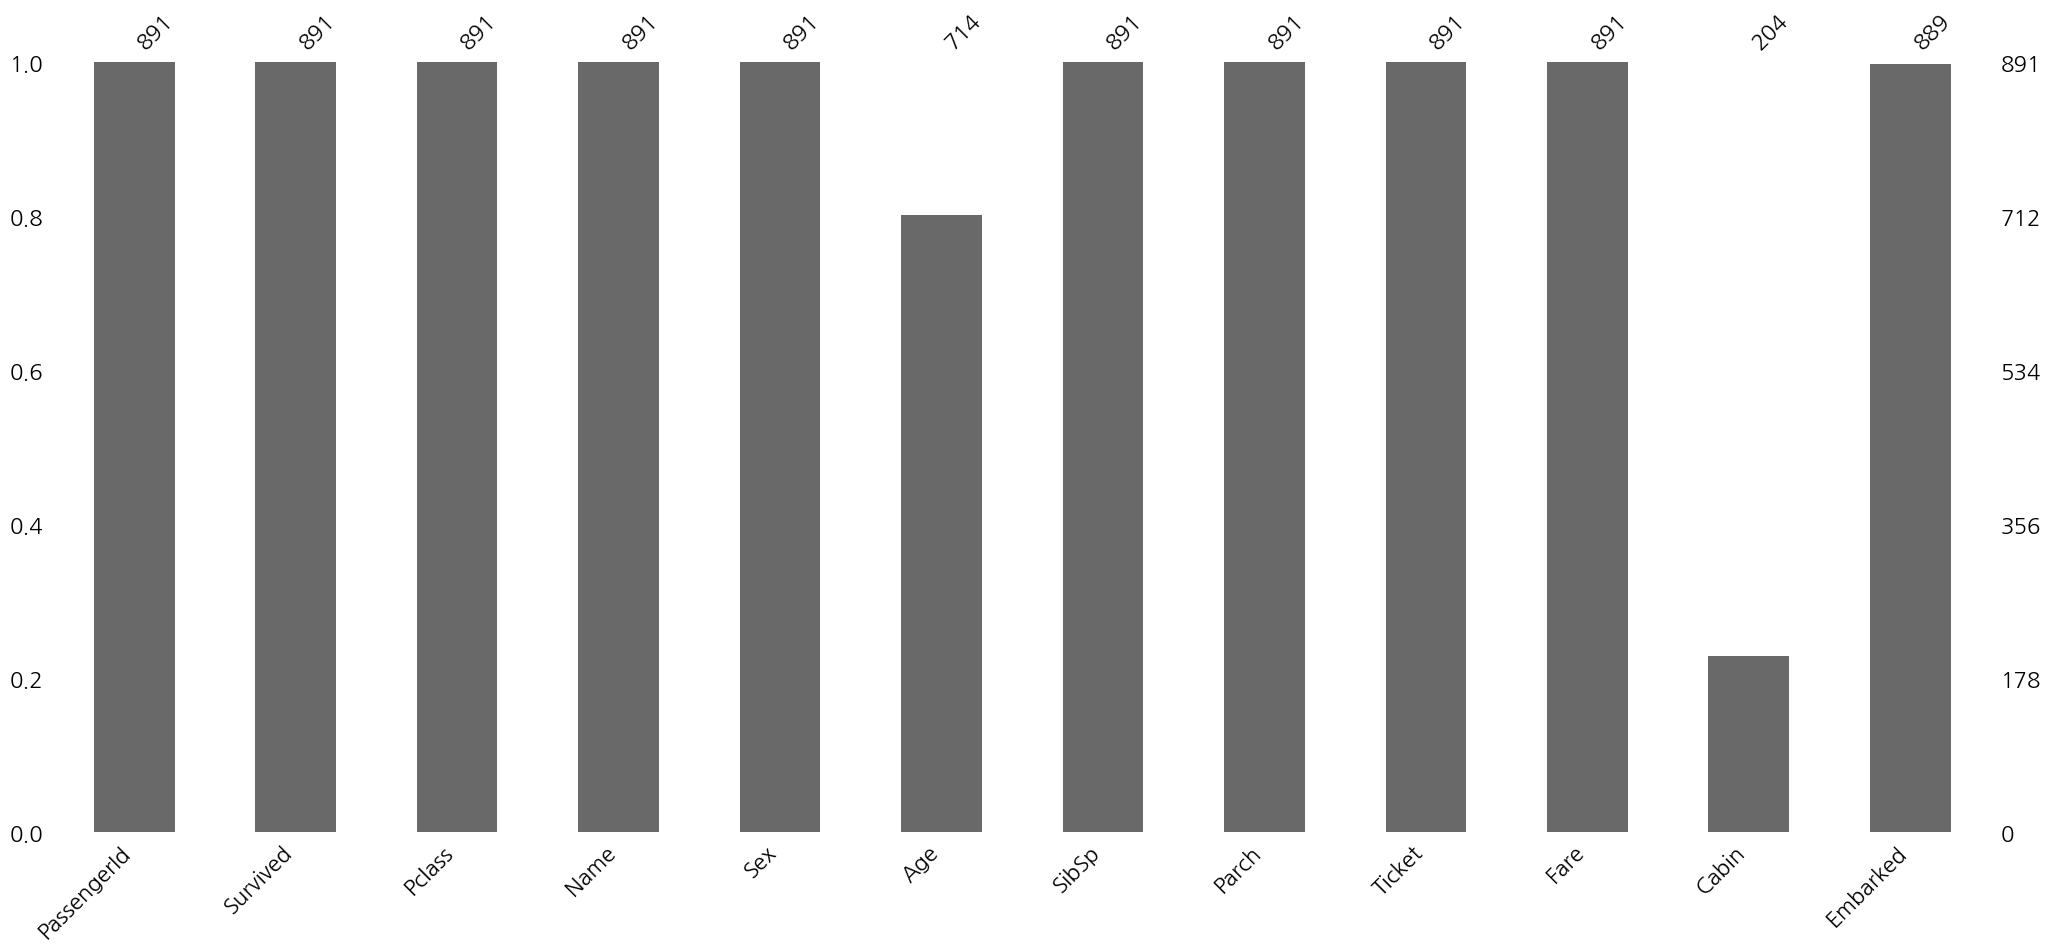

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [5]:
# 결측값 시각화
# 결측값 비율 확인

msno.matrix(df_train)
plt.show()

msno.bar(df_train)
plt.show()

df_train.isnull().sum() / len(df_train)

### note 2 결측치 확인

* 모집단
    * 전체 타이타닉 승객 수 = 2240
* 표본집단
    * 데이터 타이타닉 승객 수 = 891

표본은 약 40% 승객의 데이터로 이루어져 있다.
더이상의 표본은 수집이 가능하지 않는다.

891명의 데이터 중에 Age, Cabin, Embarked 에서 결측치 발견.

Age, 승객 나이의 약 20%가 비어있다.

Cabin, 객실 넘버의 약 77%가 비어있다.

Embarked, 승선지의 약 0.002%가 비어있다.


### 변수의 통계적 특성

Counter({0: 549, 1: 342})
Survived
0    0.616162
1    0.383838
Name: count, dtype: float64
불균형 정도 : 1.605263157894737
소수클래스비율 : 0.3838383838383838


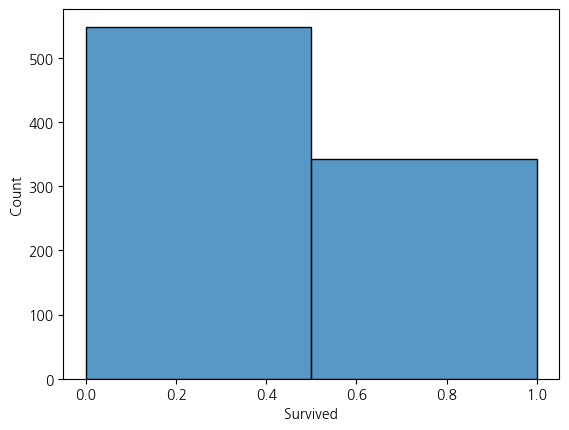

In [6]:
# 종속 변수

cnt_survived = Counter(df_train['Survived'])

Imbalanced_Ratio = cnt_survived[max(cnt_survived, key=cnt_survived.get)] / cnt_survived[min(cnt_survived, key=cnt_survived.get)]

소수클래스비율 = cnt_survived[min(cnt_survived, key=cnt_survived.get)] / len(df_train['Survived'])

print(
    cnt_survived,
    df_train['Survived'].value_counts() / len(df_train['Survived']),
    f'불균형 정도 : {Imbalanced_Ratio}',
    f'소수클래스비율 : {소수클래스비율}',
    sep='\n'
    )

sns.histplot(data=df_train, x='Survived', binwidth=0.5);

In [7]:
명목 = ['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
서열 = ['Pclass']
비율_이산 = ['SibSp', 'Parch']
비율_연속 = ['Age', 'Fare']

In [8]:
# Name

cnt_Name = Counter(df_train['Name'])

display(cnt_Name.most_common(10), sorted(Counter([len(i) for i in df_train['Name']]).items())[:10])

[('Braund, Mr. Owen Harris', 1),
 ('Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 1),
 ('Heikkinen, Miss. Laina', 1),
 ('Futrelle, Mrs. Jacques Heath (Lily May Peel)', 1),
 ('Allen, Mr. William Henry', 1),
 ('Moran, Mr. James', 1),
 ('McCarthy, Mr. Timothy J', 1),
 ('Palsson, Master. Gosta Leonard', 1),
 ('Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 1),
 ('Nasser, Mrs. Nicholas (Adele Achem)', 1)]

[(12, 2),
 (13, 2),
 (14, 3),
 (15, 15),
 (16, 26),
 (17, 42),
 (18, 50),
 (19, 64),
 (20, 39),
 (21, 40)]

Counter({'male': 577, 'female': 314})
Sex
male      0.647587
female    0.352413
Name: count, dtype: float64
불균형 정도 : 1.8375796178343948
소수클래스비율 : 0.35241301907968575


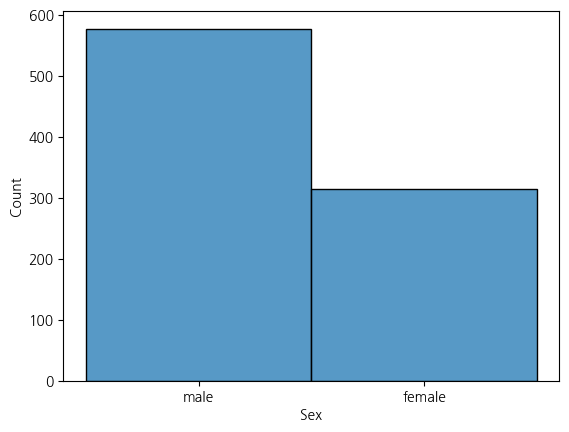

In [9]:
# Sex

cnt_Sex = Counter(df_train['Sex'])

Imbalanced_Ratio = cnt_Sex[max(cnt_Sex, key=cnt_Sex.get)] / cnt_Sex[min(cnt_Sex, key=cnt_Sex.get)]

소수클래스비율 = cnt_Sex[min(cnt_Sex, key=cnt_Sex.get)] / len(df_train['Sex'])

print(
    cnt_Sex,
    df_train['Sex'].value_counts() / len(df_train['Sex']),
    f'불균형 정도 : {Imbalanced_Ratio}',
    f'소수클래스비율 : {소수클래스비율}',
    sep='\n'
    )

sns.histplot(data=df_train, x='Sex', binwidth=0.5);

In [10]:
# Ticket

cnt_Ticket = Counter(df_train['Ticket'])

cnt_Ticket.most_common(10), len(cnt_Ticket)

([('347082', 7),
  ('1601', 7),
  ('CA. 2343', 7),
  ('3101295', 6),
  ('CA 2144', 6),
  ('347088', 6),
  ('382652', 5),
  ('S.O.C. 14879', 5),
  ('349909', 4),
  ('347077', 4)],
 681)

In [11]:
# Cabin

cnt_Cabin = Counter(df_train['Cabin'])

cnt_Cabin.most_common(10), len(cnt_Cabin)

([(nan, 687),
  ('G6', 4),
  ('C23 C25 C27', 4),
  ('B96 B98', 4),
  ('F33', 3),
  ('E101', 3),
  ('F2', 3),
  ('D', 3),
  ('C22 C26', 3),
  ('C123', 2)],
 148)

결측치 : 2
Counter({'S': 644, 'C': 168, 'Q': 77})
Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: count, dtype: float64
불균형 정도 : 8.363636363636363
소수클래스비율 : 0.08661417322834646


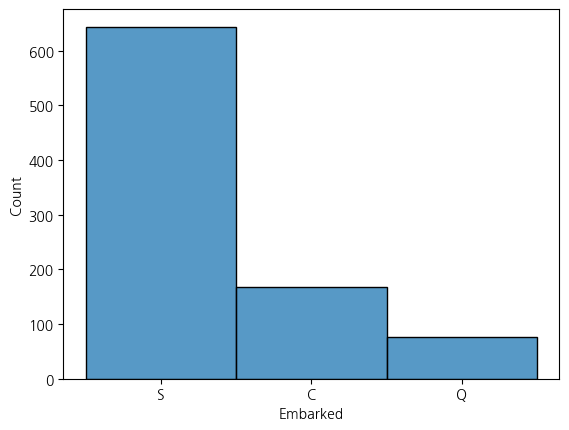

In [12]:
# Embarked

cnt_Embarked = Counter(df_train['Embarked'].dropna())

Imbalanced_Ratio = cnt_Embarked[max(cnt_Embarked, key=cnt_Embarked.get)] / cnt_Embarked[min(cnt_Embarked, key=cnt_Embarked.get)]

소수클래스비율 = cnt_Embarked[min(cnt_Embarked, key=cnt_Embarked.get)] / len(df_train['Embarked'].dropna())

print(
    f'결측치 : {sum(df_train['Embarked'].isna())}',
    cnt_Embarked,
    df_train['Embarked'].dropna().value_counts() / len(df_train['Embarked'].dropna()),
    f'불균형 정도 : {Imbalanced_Ratio}',
    f'소수클래스비율 : {소수클래스비율}',
    sep='\n'
    )

sns.histplot(data=df_train, x='Embarked', binwidth=0.5);

Counter({3: 491, 1: 216, 2: 184})
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: count, dtype: float64
불균형 정도 : 2.6684782608695654
소수클래스비율 : 0.20650953984287318


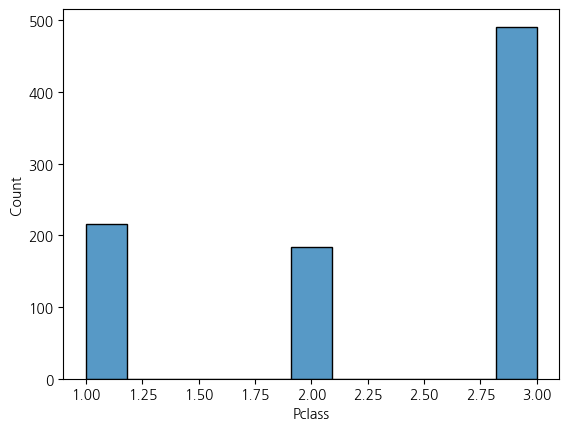

In [13]:
# Pclass

cnt_Pclass = Counter(df_train['Pclass'].dropna())

Imbalanced_Ratio = cnt_Pclass[max(cnt_Pclass, key=cnt_Pclass.get)] / cnt_Pclass[min(cnt_Pclass, key=cnt_Pclass.get)]

소수클래스비율 = cnt_Pclass[min(cnt_Pclass, key=cnt_Pclass.get)] / len(df_train['Pclass'].dropna())

print(
    cnt_Pclass,
    df_train['Pclass'].dropna().value_counts() / len(df_train['Pclass'].dropna()),
    f'불균형 정도 : {Imbalanced_Ratio}',
    f'소수클래스비율 : {소수클래스비율}',
    sep='\n'
    )

sns.histplot(data=df_train, x='Pclass');

Counter({0: 608, 1: 209, 2: 28, 4: 18, 3: 16, 8: 7, 5: 5})
SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: count, dtype: float64
불균형 정도 : 121.6
소수클래스비율 : 0.005611672278338945


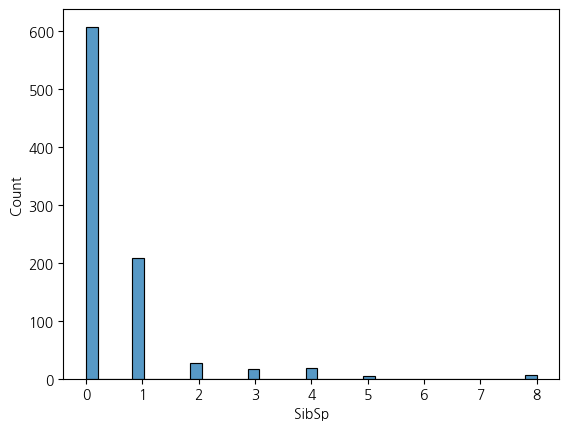

In [14]:
# SibSp

cnt_SibSp = Counter(df_train['SibSp'].dropna())

Imbalanced_Ratio = cnt_SibSp[max(cnt_SibSp, key=cnt_SibSp.get)] / cnt_SibSp[min(cnt_SibSp, key=cnt_SibSp.get)]

소수클래스비율 = cnt_SibSp[min(cnt_SibSp, key=cnt_SibSp.get)] / len(df_train['SibSp'].dropna())

print(
    cnt_SibSp,
    df_train['SibSp'].dropna().value_counts() / len(df_train['SibSp'].dropna()),
    f'불균형 정도 : {Imbalanced_Ratio}',
    f'소수클래스비율 : {소수클래스비율}',
    sep='\n'
    )

sns.histplot(data=df_train, x='SibSp');

왜도 : 3.6953517271630565
첨도 : 17.880419726645968


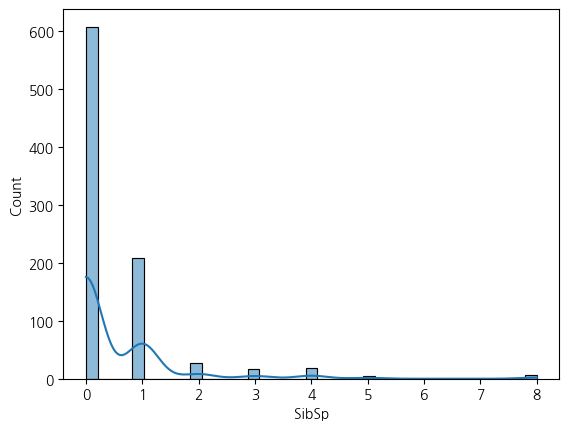

In [23]:
# SibSp

왜도 = df_train['SibSp'].skew()
첨도 = df_train['SibSp'].kurtosis()

print(
    f'왜도 : {왜도}\n첨도 : {첨도}'
)
sns.histplot(df_train['SibSp'], kde=True);

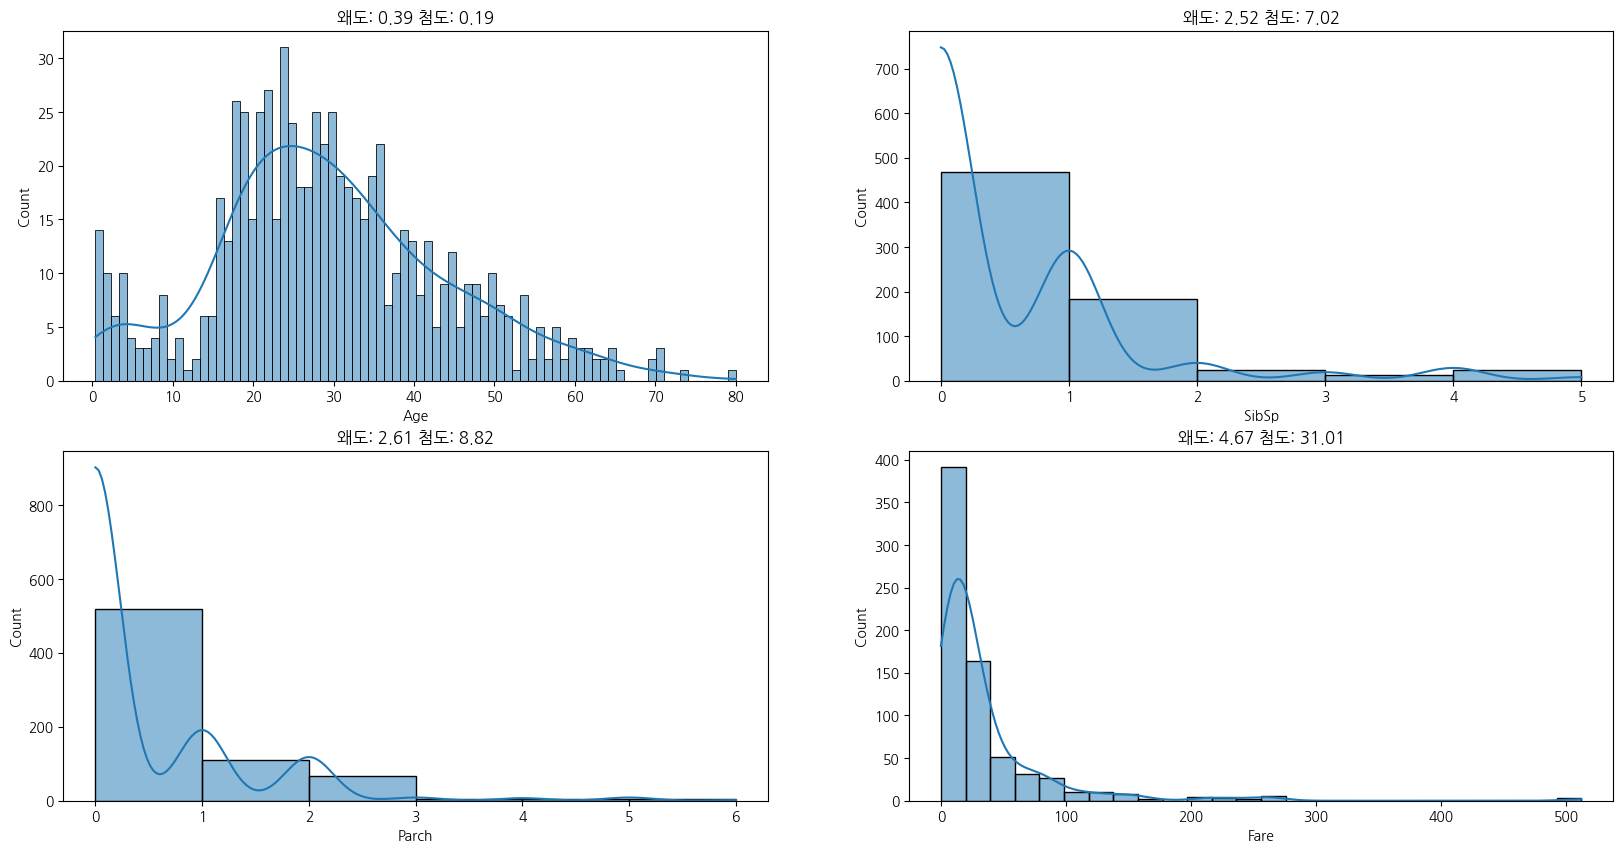

In [ ]:
# 수치형 변수 분포

비율_이산 = ['SibSp', 'Parch']
비율_연속 = ['Age', 'Fare']

수치형변수 = 비율_이산 + 비율_연속

왜도 = dict(df_train[수치형변수].skew())
첨도 = df_train[수치형변수].kurtosis()

fig, axes = plt.subplots(
    2,2,
    figsize=(20,10)
)

axes = axes.flatten()

sns.histplot(df_train['Age'], kde=True, binwidth=1, ax=axes[0]).set_title(f'왜도: {round(왜도['Age'], 2)} 첨도: {round(첨도['Age'], 2)}')
sns.histplot(df_train['SibSp'], kde=True, binwidth=1, ax=axes[1]).set_title(f'왜도: {round(왜도['SibSp'], 2)} 첨도: {round(첨도['SibSp'], 2)}')
sns.histplot(df_train['Parch'], kde=True, binwidth=1, ax=axes[2]).set_title(f'왜도: {round(왜도['Parch'], 2)} 첨도: {round(첨도['Parch'], 2)}')
sns.histplot(df_train['Fare'], kde=True, binwidth=20, ax=axes[3]).set_title(f'왜도: {round(왜도['Fare'], 2)} 첨도: {round(첨도['Fare'], 2)}');

### note 3 변수의 통계적 특성

결측치를 제외하고 통계적 특성을 확인한다.

명목 = ['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
서열 = ['Pclass']
비율_이산 = ['SibSp', 'Parch']
비율_연속 = ['Age', 'Fare']

명목 변수 개별 범주의 빈도 수, 상대 빈도 확인

* 종속 변수

    * 명목 변수

        * Survived 에서 0 클래스는 약 62%, 1 클래스는 약 38%로 클래스 불균형이 약간 존재한다.

* 독립 변수

    * 명목 변수

        * Name 변수는 891 개의 샘플 모두 다른 클래스를 가진다.

        * Sex 변수는 female 클래스는 약 35%, male 클래스는 약 65%로 클래스 불균형이 약간 존재한다.

        * Ticket 변수는 681 개의 클래스를 가진다. 클래스 사이에 어떠한 패턴이나 정보가 있는지 확인할 것이다.

        * Cabin 변수는 148 개의 클래스를 가진다. 결측치를 unknown 클래스로 하고, 클래스 사이에 어떠한 패턴이나 정보가 있는지 확인할 것이다.

        * Embarked 변수는 3 개의 클래스를 가진다. S 클래스는 약 72%, C 클래스는 약 19%, Q 클래스는 약 9%로 클래스 불균형이 존재한다.

        * Pclass 변수는 3 개의 클래스를 가진다. 1 클래스는 약 21%, 2 클래스는 약 24%, 3 클래스는 약 55%로 클래스 불균형이 존재한다.

비율 이산 빈도 수, 상대 빈도 확인, 평균 

    * 비율 이산

        * 

    * 비율 연속

        * 


### 오류

In [15]:
pd.get_dummies(df_train[['Survived','Sex','Age','Pclass','Fare']].dropna()).corr()

,Survived,Age,Pclass,Fare,Sex_female,Sex_male
Survived,1.000000,-0.077221,-0.359653,0.268189,0.538826,-0.538826
Age,-0.077221,1.000000,-0.369226,0.096067,-0.093254,0.093254
Pclass,-0.359653,-0.369226,1.000000,-0.554182,-0.155460,0.155460
Fare,0.268189,0.096067,-0.554182,1.000000,0.184994,-0.184994
Sex_female,0.538826,-0.093254,-0.155460,0.184994,1.000000,-1.000000
Sex_male,-0.538826,0.093254,0.155460,-0.184994,-1.000000,1.000000


### 변수 간의 관계

* 변수 간의 관계
    * 인과 관계
        * Survived 변수와 다른 변수 사이 인과 관계
    * 상관 관계
        * 각 변수들 사이의 상관 관계
    * 독립 관계
        * 별 의미 없는 변수
    * 의사 관계
        * 제 3 변수와 관계에 따른 관계
    * 양방향적 인과 관계
        * 조절 관계
        * 매개 관계

### 변수의 통계적 특성과 관계에 따라 결측치와 이상치 처리

* 결측치 처리 계획
    * 제거
    * 대치
    * 보간
    * 다중 대치

* Age = 승객 나이 
    * 예상
    * 예상으로는 예측 목표가 생존이라, 나이가 많이 중요하면, 평균값을 했다가 오히려 결과가 안 좋을 수도 있을거라 생각한다.
    * 나이를 예측하여, 채운 뒤 예측하는 것이 좋을거라 예상한다.

* Cabin = Cabin number 객실 넘버
    * 예상
    * 결측치가 데이터의 절반이 넘게 있어서, 변수자체를 제거하는 것이 가장 좋은 예측을 할 것 같다

* Embarked = Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
    * 예상
    * 승선지가 다른 변수랑 관련이 있을 것 같다. 그러나 양이 너무 작아서 결측치 행만 제거해도 좋을 것 같다.

In [8]:
# 결측치 처리 데이터
# Age 행 제거, Cabin 컬럼 제거, Embarked 행 제거

사용할변수 = [
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked'
]

m_Age = df_train['Age'].notna()
m_Embarked = df_train['Embarked'].notna()

m = m_Age & m_Embarked

df_train_결측치처리1 = df_train[m][사용할변수]
df_train_결측치처리1_예측값 = df_train[m]['Survived']

ohe = OneHotEncoder(sparse_output=False)
ohe_Pclass = ohe.fit_transform(df_train_결측치처리1[['Pclass']])
ohe_Pclass = pd.DataFrame(ohe_Pclass, columns=ohe.get_feature_names_out(), index=df_train_결측치처리1.index)

ohe = OneHotEncoder(sparse_output=False)
ohe_Sex = ohe.fit_transform(df_train_결측치처리1[['Sex']])
ohe_Sex = pd.DataFrame(ohe_Sex, columns=ohe.get_feature_names_out(), index=df_train_결측치처리1.index)

ohe = OneHotEncoder(sparse_output=False)
ohe_Embarked = ohe.fit_transform(df_train_결측치처리1[['Embarked']])
ohe_Embarked = pd.DataFrame(ohe_Embarked, columns=ohe.get_feature_names_out(), index=df_train_결측치처리1.index)

df_train_결측치처리1 = pd.concat([df_train_결측치처리1[['Age', 'SibSp', 'Parch', 'Fare']], ohe_Pclass, ohe_Sex, ohe_Embarked], axis=1)
df_train_결측치처리1

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
886,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,19.0,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,26.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### 변수 가공

변수 구간화

표준화 정규화 스케일링

파생변수

슬라이딩 윈도우, 언더오버샘플링

변수 간 거리

## 통계적 분석

## 머신러닝 예측

### 결측치 처리 데이터 1 랜덤포레스트

In [9]:
# 학습, 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(df_train_결측치처리1, df_train_결측치처리1_예측값, test_size=0.2, shuffle=True, random_state=42)

In [10]:
# 랜덤 포레스트 모델 학습

model_rf = RandomForestClassifier(
    n_estimators=450,
    max_depth=5,
    random_state=0)

model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=450, random_state=0)

In [11]:
# 테스트 데이터 예측

predict = model_rf.predict(X_test)

In [12]:
# 예측 평가

accuracy_score(y_test, predict) 

0.8041958041958042

<Axes: ylabel='None'>

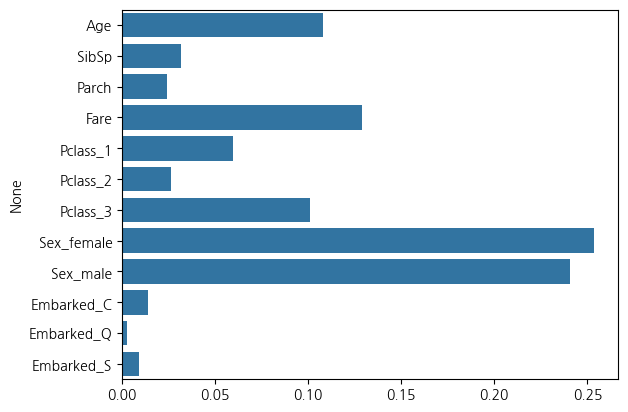

In [13]:
# 랜덤 포레스트 변수 중요도

sns.barplot(
    x=model_rf.feature_importances_,
    y=X_test.columns
)

### note 3 변수 분석 계획

각 변수의 기본적인 통계 분석하고, 변수 간 분석을 할 것이다.

통계 기반, 머신러닝 분석 방법론 모두 사용할 것이다.

종속 변수인 생존 여부가 명목 척도라서, 

비율 척도의 독립 변수인 나이, 자녀수, 부모수, 요금은 Logistic 회귀분석을 사용하고, 

명목/서열 척도의 독립 변수인 객실 등급, 성별, 승선지는 X^2 분석을 할 것이다.

* 종속 변수
    * Survived 생존여부 = 명목 척도

* 독립변수
    * Age 나이 = 비율 척도
    * SibSp 자녀수 = 비율 척도
    * Parch 부모수 = 비율 척도
    * Fare 요금 = 비율 척도

    * Pclass 객실 등급 = 서열 척도
    * Sex 성별 = 명목 척도
    * Embarked 승선지 = 명목 척도

Logistic 회귀분석, X^2 분석

In [15]:
# 변수 평균, 편차, 4분위수

수치형변수 = [
    'Age',
    'SibSp',
    'Parch',
    'Fare',
]

카테고리형변수 = [
    'Pclass_1',
    'Pclass_2',
    'Pclass_3',
    'Sex_female',
    'Sex_male',
    'Embarked_C',
    'Embarked_Q',
    'Embarked_S'
]

df_train_결측치처리1[수치형변수].describe()

,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000
mean,29.642093,0.514045,0.432584,34.567251
std,14.492933,0.930692,0.854181,52.938648
min,0.420000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,15.645850
75%,38.000000,1.000000,1.000000,33.000000
max,80.000000,5.000000,6.000000,512.329200


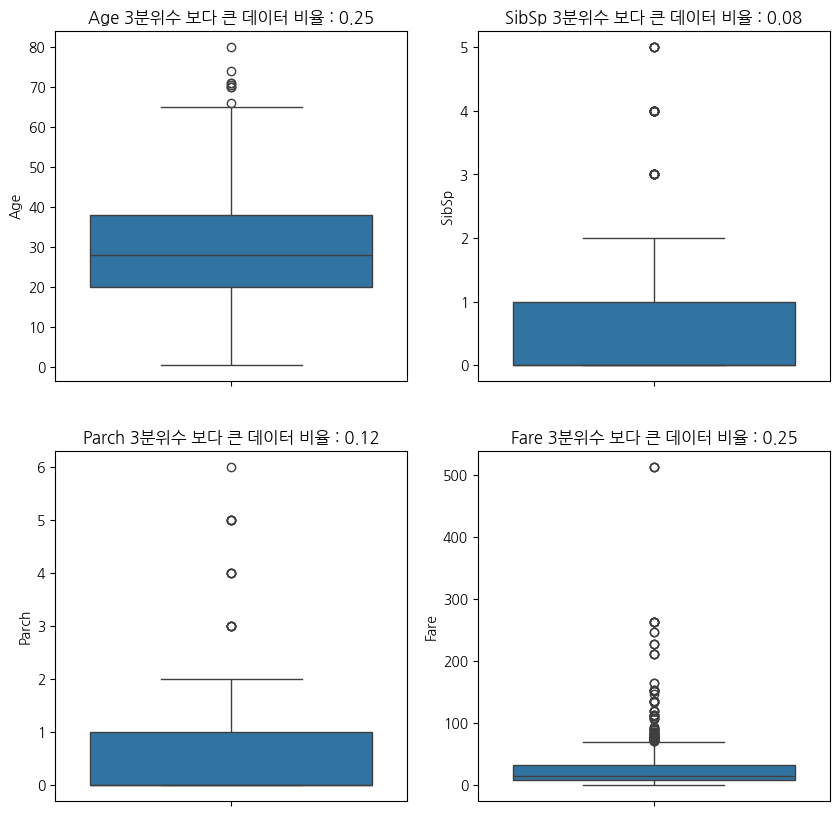

In [17]:
# 수치형 변수 박스 플롯

fig, axes = plt.subplots(
    2,2,
    figsize=(10,10)
)

axes = axes.flatten()

Q3_Age = df_train_결측치처리1['Age'].quantile(0.75)
Q3_SibSp = df_train_결측치처리1['SibSp'].quantile(0.75)
Q3_Parch = df_train_결측치처리1['Parch'].quantile(0.75)
Q3_Fare = df_train_결측치처리1['Fare'].quantile(0.75)

sns.boxplot(df_train_결측치처리1['Age'], ax=axes[0]).set_title(f'Age 3분위수 보다 큰 데이터 비율 : {round((df_train_결측치처리1['Age'] > Q3_Age).sum() / len(df_train_결측치처리1), 2)}')
sns.boxplot(df_train_결측치처리1['SibSp'], ax=axes[1]).set_title(f'SibSp 3분위수 보다 큰 데이터 비율 : {round((df_train_결측치처리1['SibSp'] > Q3_SibSp).sum() / len(df_train_결측치처리1), 2)}')
sns.boxplot(df_train_결측치처리1['Parch'], ax=axes[2]).set_title(f'Parch 3분위수 보다 큰 데이터 비율 : {round((df_train_결측치처리1['Parch'] > Q3_Parch).sum() / len(df_train_결측치처리1), 2)}')
sns.boxplot(df_train_결측치처리1['Fare'], ax=axes[3]).set_title(f'Fare 3분위수 보다 큰 데이터 비율 : {round((df_train_결측치처리1['Fare'] > Q3_Fare).sum() / len(df_train_결측치처리1), 2)}');

### note 4 수치형 변수 전처리 계획

나이와 요금은 3분위수 보다 큰 데이터랑 2분위수 보다 큰 데이터 사이에 관계를 확인하고,

3분위수 대치를 할지 로그를 취할지 표준화, 로버스트 스케일링을 다 해볼 것

자녀수와 부모수는 카테고리 같은데 생각해 볼것

<Axes: ylabel='Fare'>

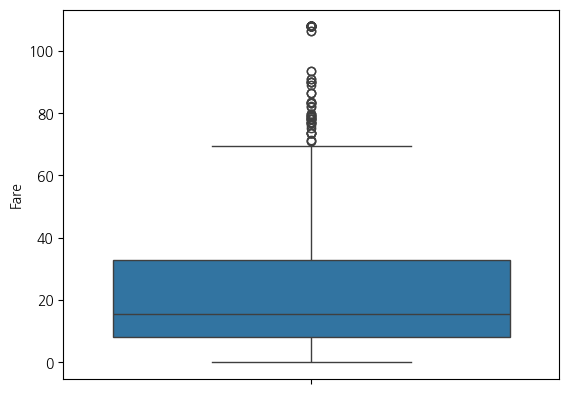

In [18]:
# IQR 3 기준 이상치 대치

def 이상치처리(df, col, value):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    rev_range = 3
    if value < (Q1 - rev_range * IQR):
        value = Q1 - rev_range * IQR
    if value > (Q3 + rev_range * IQR):
        value = Q3 + rev_range * IQR
    return value

sns.boxplot(df_train_결측치처리1['Fare'].apply(lambda x: 이상치처리(df_train_결측치처리1, 'Fare', x)))

<Axes: >

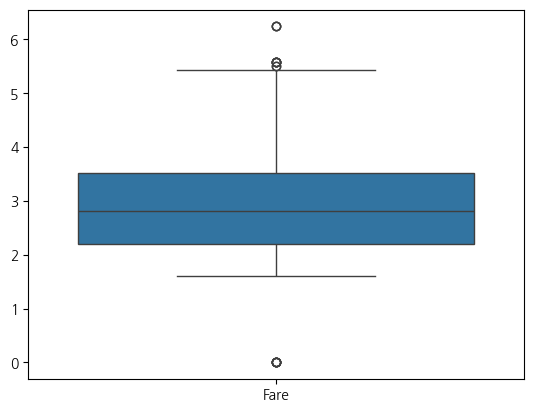

In [19]:
# 로그 스케일링

sns.boxplot(np.log(df_train_결측치처리1[['Fare']]+1))

In [20]:
# 이상치 처리

df_train_이상치처리1 = df_train_결측치처리1.copy()
df_train_이상치처리1_예측값 = df_train_결측치처리1_예측값.copy()

def 이상치처리(df, col, value):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    rev_range = 3
    if value < (Q1 - rev_range * IQR):
        value = Q1 - rev_range * IQR
    if value > (Q3 + rev_range * IQR):
        value = Q3 + rev_range * IQR
    return value

df_train_이상치처리1['Age'] = df_train_이상치처리1['Age'].apply(lambda x: 이상치처리(df_train_이상치처리1, 'Age', x))

df_train_이상치처리1['Fare'] = np.log(df_train_이상치처리1[['Fare']]+1)
df_train_이상치처리1

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,4.280593,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,0,0,2.188856,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,1,0,3.990834,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0,2.202765,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,3.405355,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
886,27.0,0,0,2.639057,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,19.0,0,0,3.433987,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,26.0,0,0,3.433987,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [21]:
# 이상치 처리 

X_train, X_test, y_train, y_test = train_test_split(df_train_이상치처리1, df_train_이상치처리1_예측값, test_size=0.2, shuffle=True, random_state=42)

model_rf = RandomForestClassifier(
    n_estimators=450,
    max_depth=5,
    random_state=0)

model_rf.fit(X_train, y_train)

predict = model_rf.predict(X_test)

accuracy_score(y_test, predict)

0.8041958041958042

<Axes: >

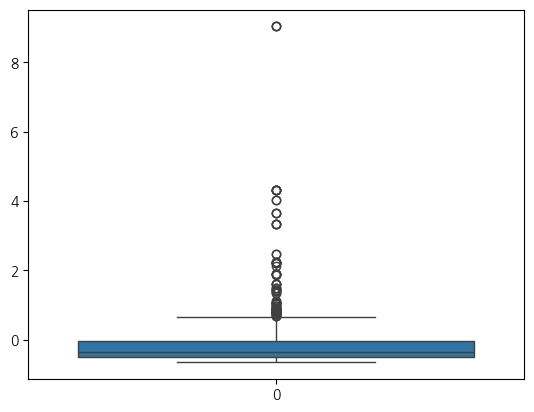

In [22]:
# 표준화 스케일링

표준화스케일러 = StandardScaler()

sns.boxplot(표준화스케일러.fit_transform(df_train_결측치처리1[['Fare']]))

<Axes: >

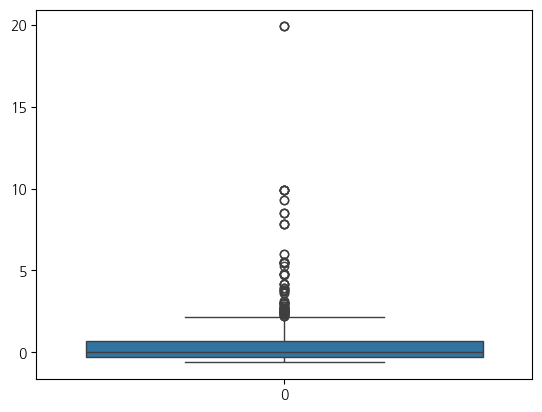

In [23]:
# RobustScaler

로버스트스케일러 = RobustScaler()

sns.boxplot(로버스트스케일러.fit_transform(df_train_결측치처리1[['Fare']]))

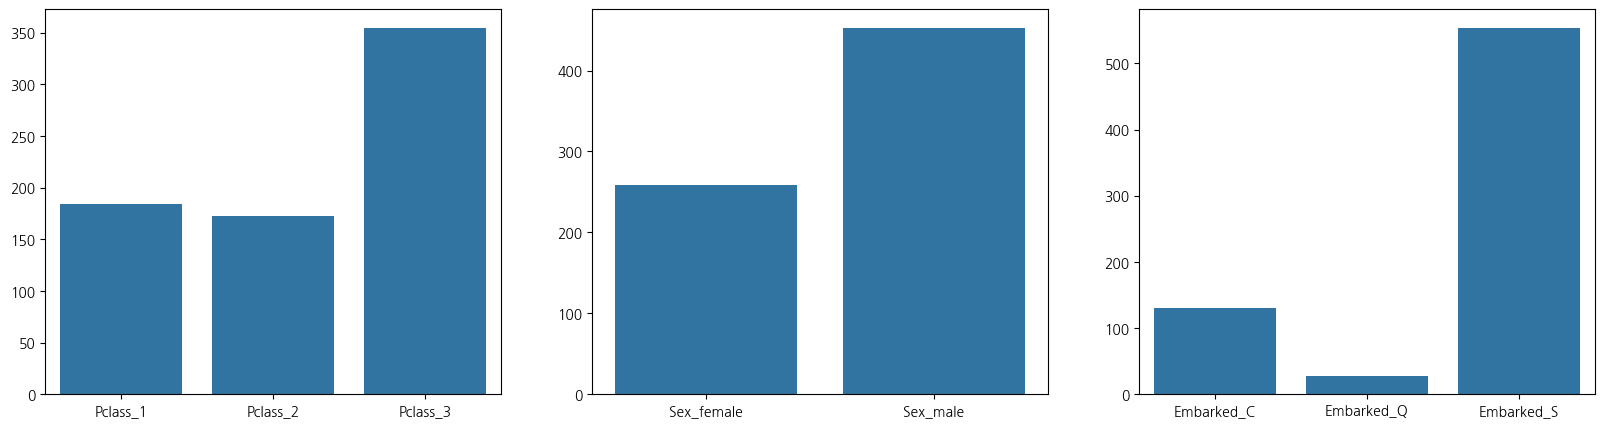

In [24]:
# 카테고리형 변수 비율

fig, axes = plt.subplots(
    1,3,
    figsize=(20,5)
)

sns.barplot(df_train_결측치처리1[['Pclass_1','Pclass_2','Pclass_3']].sum(), ax=axes[0])
sns.barplot(df_train_결측치처리1[['Sex_female','Sex_male']].sum(), ax=axes[1])
sns.barplot(df_train_결측치처리1[['Embarked_C','Embarked_Q','Embarked_S']].sum(), ax=axes[2]);

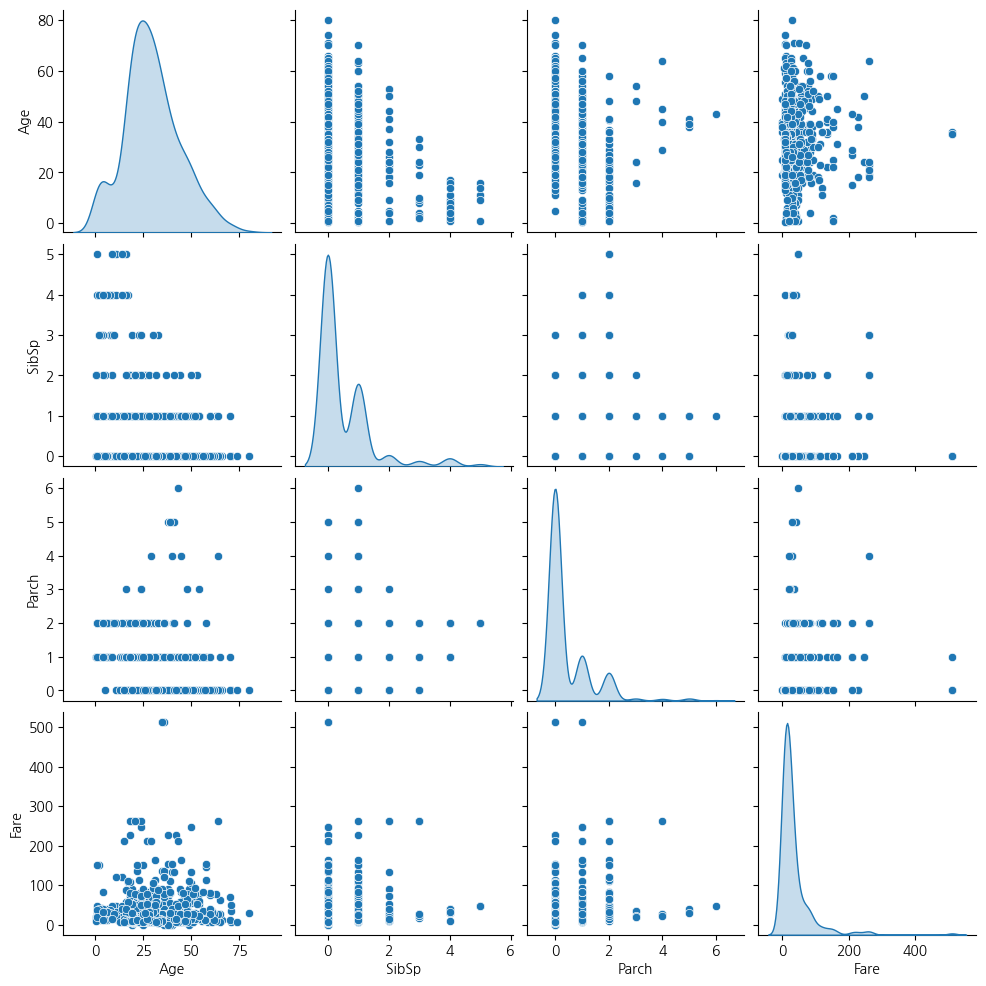

In [25]:
sns.pairplot(
    df_train_결측치처리1[수치형변수],
    diag_kind='kde'
    )


### note



In [26]:
# 성 이름
Counter([i.split(' ')[-1] if len(i.split(' ')) > 1 else i for i in df_train['Name']]).most_common(10)

[('John', 16),
 ('Henry', 15),
 ('William', 15),
 ('James', 14),
 ('Jr', 9),
 ('George', 8),
 ('Mary', 8),
 ('J', 7),
 ('Charles', 7),
 ('Alfred', 7)]

In [27]:
df_train_결측치처리1[수치형변수].cov()

,Age,SibSp,Parch,Fare
Age,210.045104,-4.145690,-2.326082,71.462319
SibSp,-4.145690,0.866188,0.304746,6.890868
Parch,-2.326082,0.304746,0.729626,9.343359
Fare,71.462319,6.890868,9.343359,2802.500471


In [28]:
df_train_결측치처리1[수치형변수].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.307351,1.000000,0.383338,0.139860
Parch,-0.187896,0.383338,1.000000,0.206624
Fare,0.093143,0.139860,0.206624,1.000000


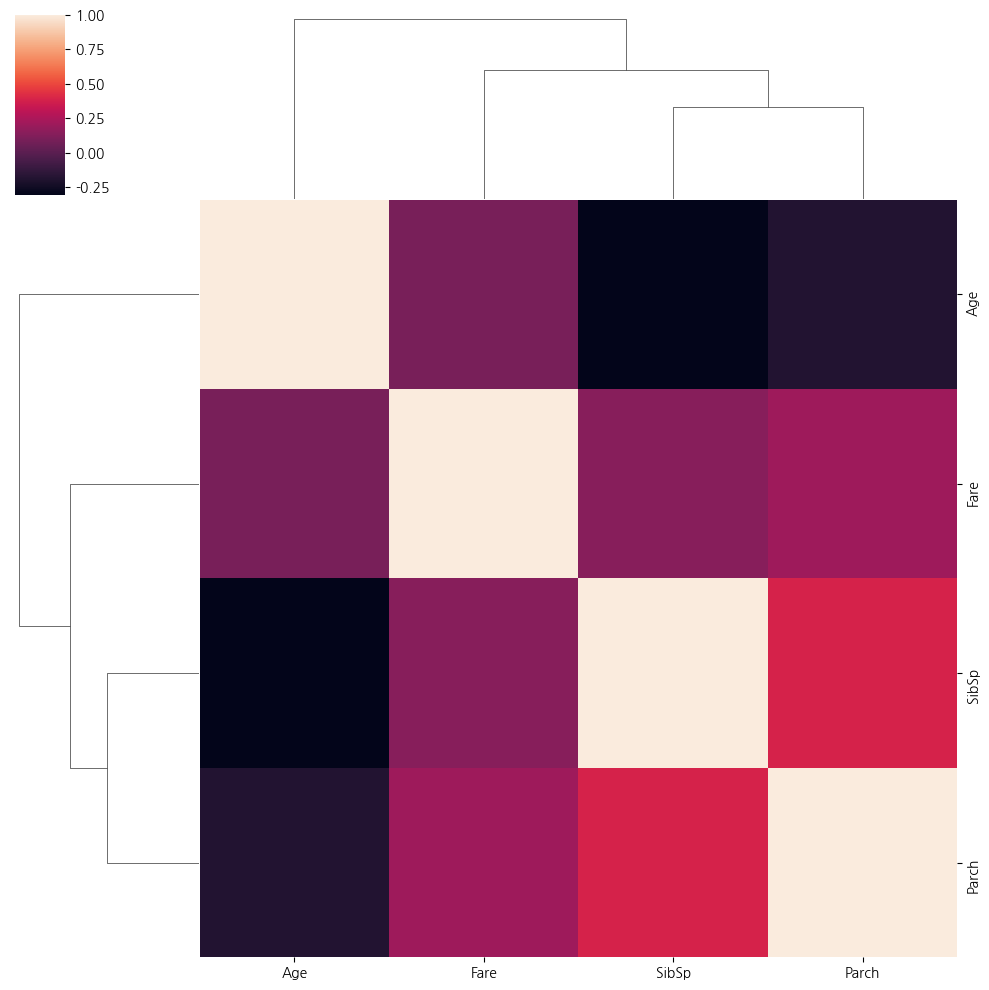

In [29]:
sns.clustermap(df_train_결측치처리1[수치형변수].corr())

In [30]:
df_train_이상치처리1

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,4.280593,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,26.0,0,0,2.188856,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,35.0,1,0,3.990834,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0,2.202765,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,3.405355,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
886,27.0,0,0,2.639057,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,19.0,0,0,3.433987,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,26.0,0,0,3.433987,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [31]:
df_train_이상치처리1_예측값

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [32]:
df_train_이상치처리1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 712, dtype: float64

## 분석 평가